<a href="https://colab.research.google.com/github/imran9891/TensorFlow/blob/main/03__introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practise of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.



In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-18 12:17:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  34.4MB/s    in 3.0s    

2021-07-18 12:17:25 (34.4 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.... this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories or folders and {len(filenames)} images in '{dirpath}'.")


There are 2 directories or folders and 1 images in 'pizza_steak'.
There are 2 directories or folders and 1 images in 'pizza_steak/test'.
There are 0 directories or folders and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories or folders and 250 images in 'pizza_steak/test/steak'.
There are 2 directories or folders and 1 images in 'pizza_steak/train'.
There are 0 directories or folders and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories or folders and 750 images in 'pizza_steak/train/steak'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 18 09:36 .
drwxr-xr-x 1 root root 4096 Jul 18 09:36 ..
-rw-r--r-- 1 root root 6148 Jul 18 09:36 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 18 09:36 test
drwxr-xr-x 4 root root 4096 Jul 18 09:36 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [6]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[1:] # removes .DS_Store
print(class_names)

pizza_steak/train
['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we'll view images from here)
  target_folder = target_dir+target_class
  print(target_folder)

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(target_folder + "/" + random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


pizza_steak/train/pizza
['2965.jpg']
pizza_steak/train/pizza/2965.jpg
Image shape: (512, 384, 3)


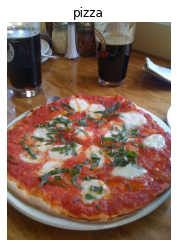

In [8]:
# View a random_image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [9]:
# The images we've imported and plotted are actually giant arrays/tensors of diferent pixel values.
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[255, 255, 248],
        [254, 255, 247],
        [246, 247, 239],
        ...,
        [124, 145, 146],
        [124, 145, 148],
        [122, 146, 150]],

       [[254, 255, 250],
        [255, 255, 250],
        [255, 255, 250],
        ...,
        [123, 143, 144],
        [122, 142, 143],
        [122, 143, 146]],

       [[254, 254, 252],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [124, 142, 142],
        [123, 141, 141],
        [124, 142, 142]],

       ...,

       [[117,  94,  42],
        [118,  92,  43],
        [112,  81,  34],
        ...,
        [ 99,  78,  59],
        [ 93,  72,  53],
        [ 91,  70,  51]],

       [[117,  94,  42],
        [119,  93,  42],
        [119,  88,  41],
        ...,
        [109,  86,  68],
        [103,  80,  62],
        [ 89,  66,  48]],

       [[118,  95,  43],
        [120,  94,  45],
        [122,  91,  44],
        ...,
        [ 97,  74,  5

In [12]:
# View the image shape
img.shape # returns width,height,color-channels

(341, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also reffered to as **Normalize**) their pixel values by dividing the image arrays by 225. (since 255 is the maximum pixel value.

In [13]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.52156863, 0.44313725, 0.30588235],
        [0.52156863, 0.44313725, 0.31372549],
        [0.52156863, 0.44313725, 0.31372549],
        ...,
        [0.58823529, 0.50588235, 0.43137255],
        [0.59607843, 0.51372549, 0.43921569],
        [0.60392157, 0.52156863, 0.44705882]],

       [[0.51372549, 0.43921569, 0.30980392],
        [0.51372549, 0.43921569, 0.30980392],
        [0.51372549, 0.43921569, 0.30980392],
        ...,
        [0.58431373, 0.50196078, 0.41960784],
        [0.59215686, 0.50980392, 0.42745098],
        [0.59607843, 0.51372549, 0.43137255]],

       [[0.50980392, 0.44705882, 0.31764706],
        [0.50980392, 0.44705882, 0.31764706],
        [0.50980392, 0.44705882, 0.31764706],
        ...,
        [0.58431373, 0.50588235, 0.40784314],
        [0.58823529, 0.50980392, 0.41176471],
        [0.59607843, 0.50980392, 0.41568627]],

       ...,

       [[0.29411765, 0.23137255, 0.12941176],
        [0.29411765, 0.23137255, 0.12941176],
        [0.29411765, 0

## An end-to-end example

Let's build a convolutional neural network to find pattern in our images, more specifically we'll need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to data directories
train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = valid_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as tiny VGG on the CNN expainer website)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  # tf.keras.layers.Activations(tf.nn.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")])

# Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 196ms/step - loss: 0.5539 - accuracy: 0.7100 - val_loss: 0.3692 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4167 - accuracy: 0.8207 - val_loss: 0.3330 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4012 - accuracy: 0.8220 - val_loss: 0.4442 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3941 - accuracy: 0.8300 - val_loss: 0.3489 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3191 - accuracy: 0.8713 - val_loss: 0.2954 - val_accuracy: 0.8860


> **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

**Exercise:** Go through the CNN explainer website for  minimum of 10 minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [Tensorflow Playground](https://playground.tensorflow.org)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])


# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 174ms/step - loss: 0.9167 - accuracy: 0.4840 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more parameters than our CNN model(model_1), model_2 performs terribly... let's try to improve it.


In [18]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(
    loss = "binary_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 2.9215 - accuracy: 0.6093 - val_loss: 0.7022 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7415 - accuracy: 0.7327 - val_loss: 0.7477 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.8580 - accuracy: 0.7080 - val_loss: 0.6274 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6402 - accuracy: 0.7407 - val_loss: 0.6746 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5020 - accuracy: 0.7787 - val_loss: 0.6491 - val_accuracy: 0.7120


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
15000000/31000

483.8709677419355

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of models we're using. Where a series of dense layers which has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches).
3. Created a model (started with a baseline).
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline).
7. Repeat until satisfied (experiment, experiment, experiment).

### 1. Become one with the data

pizza_steak/train/steak
['3578934.jpg']
pizza_steak/train/steak/3578934.jpg
Image shape: (384, 512, 3)
pizza_steak/train/pizza
['1351146.jpg']
pizza_steak/train/pizza/1351146.jpg
Image shape: (512, 512, 3)


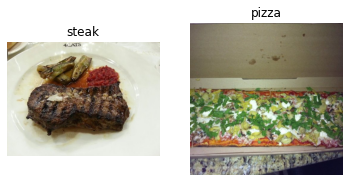

In [21]:
#  Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

No need to classify data into training and test sets since our data is already classified. 

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**. 

A Batch is a small subset of the dataset that a model looks at during training. Rather than look at all ~10k images, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health...https://twitter.com/ylecun/status/989610208497360896?s=20

In [23]:
# Create train & test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                               target_size = (224,224), # Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32, # size of mini-batches to load data into
                                               seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
print(len(images), len(labels))
images.shape, labels.shape

32 32


((32, 224, 224, 3), (32,))

In [26]:
# How many batches are there?
len(train_data) # 1500/32

47

In [27]:
# Get the first 2 images
images[:2], labels[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### Create a CNN model (starts with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the no. of sliding windows going accross an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going accross an input
         strides=1, # the size of the step the sliding window takes accross an input
         padding="valid", # if 'same' output shape is same as input shape, if 'valid' output shape gets compressed
         activation="relu",
         input_shape=(224,224,3)), # input_layer specify input shape
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

* **Filters:** decides how many filters should pass over an input tensor (e.g. sliding windows over an image) - 10, 32, 64, 128 (higher values lead to more complex models)

* **Kernel size (also called filter size):** determines the shape of the filters (sliding windows) over the output - 3, 5, 7 (lower values learn smaller features, higher values learn larger features)

* **Padding:** Pads the target tensor with zeroes (if "same") to preserve input shape. Or leaves in the target tensor as is (if "valid"), lowering output shape. - "same" or "valid"

* **Strides:** The number of steps a filter takes accross an image at a time (e.g. if strides=1, a filter moves accross an image 1 pixel at a time) - 1(default), 2

In [31]:
# Compile the model
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [32]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [33]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and train data
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 1.5037 - accuracy: 0.6580 - val_loss: 0.4462 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4518 - accuracy: 0.7987 - val_loss: 0.3949 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3336 - accuracy: 0.8727 - val_loss: 0.4174 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.1533 - accuracy: 0.9540 - val_loss: 0.4390 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0529 - accuracy: 0.9873 - val_loss: 0.5929 - val_accuracy: 0.7740


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

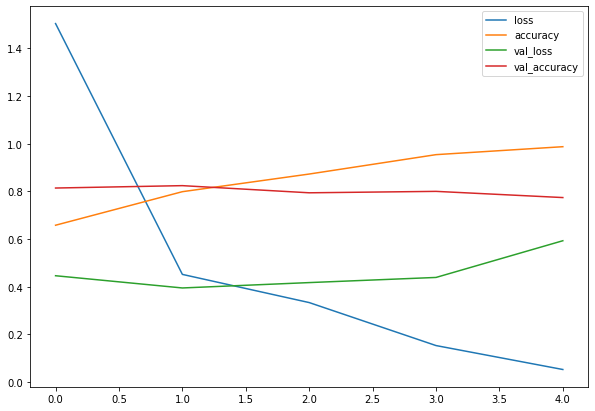

In [35]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [36]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label = "Training Loss")
  plt.plot(epochs, val_loss, label = "Validation Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "Training Accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation_loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished. 

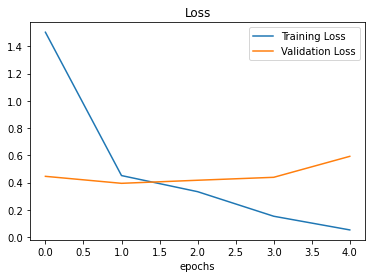

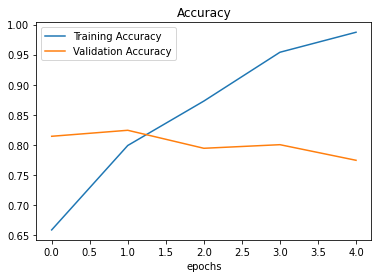

In [37]:
# Check out the loss and accuracy curves
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.


### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers - makes our neural network deeper
* Increase the number of conv filters (hidden units)
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation ~ increase the diversity of your training dataset without collecting more data (e.g. take your photos of pizza and randomly rotate them 30 degrees). Increased diversity forces a model to learn more generalizable patterns.
* Add regularization layers (such as MaxPool2D)
* Add more data... ~ gives a model more of a chance to learn patterns between samples (e.g. if a model is performing poorly on images of pizza, show it more images of pizza)
* Better data ~ Not all data samples are created equally. Removing poor samples from or adding better samples to your dataset can improve your model's performance.
* Use transfer learning ~ Take a model's pre-learned patterns from one problem and tweak them to suit your own problem. For example, take a model trained on pictures of cars to recognize pictures of trucks.

> **Note:** Reducing overfitting is also known as **Regularization**.


In [38]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [40]:
# Check the summary 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [41]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6527 - accuracy: 0.6167 - val_loss: 0.5018 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5027 - accuracy: 0.7680 - val_loss: 0.4078 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4480 - accuracy: 0.8033 - val_loss: 0.3847 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4396 - accuracy: 0.8127 - val_loss: 0.3847 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3914 - accuracy: 0.8300 - val_loss: 0.3468 - val_accuracy: 0.8520


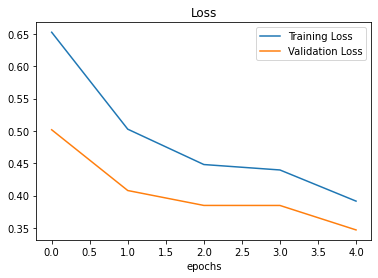

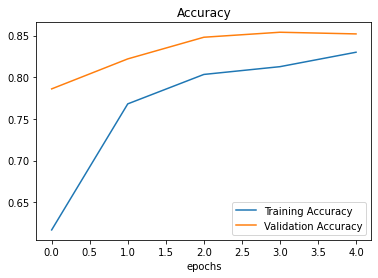

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?
# Create ImageData Generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.

Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [44]:
# Import data and augment it from training directory
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=False) # for demonsteration purposes only

# Create non-augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=False)

# Create non augmented test data batches
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             class_mode='binary',
                                             batch_size=32,
                                             target_size=(224,224))

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameter our images are left as they are in the directories but are modified as they're loaded into the model

Finally...let's visualize some augmented data! ! !

In [45]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image number: 23


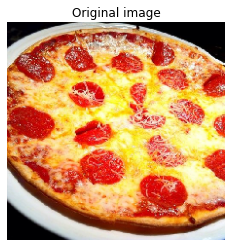

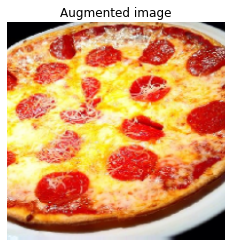

In [46]:
# Show original image and augmented image
random_number = random.randint(0,32) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [47]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compile the model
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 481ms/step - loss: 0.7067 - accuracy: 0.4240 - val_loss: 0.7008 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 21s 450ms/step - loss: 0.7223 - accuracy: 0.5107 - val_loss: 0.6820 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6911 - accuracy: 0.5533 - val_loss: 0.6704 - val_accuracy: 0.5400
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6801 - accuracy: 0.5873 - val_loss: 0.6431 - val_accuracy: 0.6180
Epoch 5/5
47/47 [==============================] - 21s 446ms/step - loss: 0.6399 - accuracy: 0.6627 - val_loss: 0.5910 - val_accuracy: 0.6500


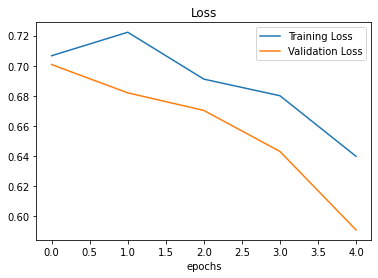

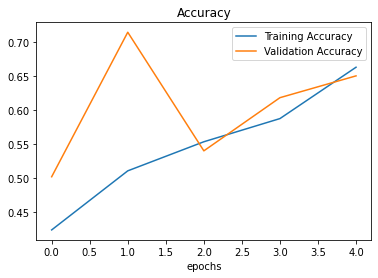

In [48]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [50]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [51]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6677 - accuracy: 0.5893 - val_loss: 0.5930 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.5547 - accuracy: 0.7267 - val_loss: 0.3748 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4937 - accuracy: 0.7667 - val_loss: 0.3802 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4936 - accuracy: 0.7627 - val_loss: 0.3446 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4644 - accuracy: 0.7840 - val_loss: 0.3446 - val_accuracy: 0.8620


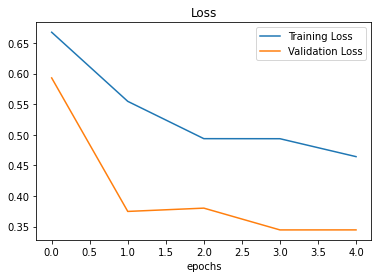

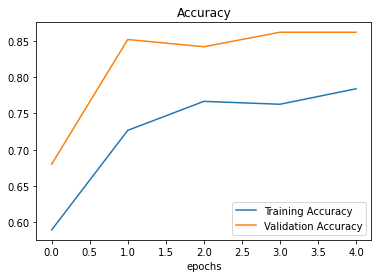

In [52]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features accross a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Exercise:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data

In [54]:
# Create the model
model_8 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compile the model
model_8.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                      epochs = 5,
                      steps_per_epoch = len(train_data_augmented_shuffled),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 498ms/step - loss: 0.6190 - accuracy: 0.6560 - val_loss: 0.4678 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5418 - accuracy: 0.7333 - val_loss: 0.4423 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5209 - accuracy: 0.7613 - val_loss: 0.4173 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 23s 486ms/step - loss: 0.5377 - accuracy: 0.7327 - val_loss: 0.5023 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5431 - accuracy: 0.7407 - val_loss: 0.4185 - val_accuracy: 0.8400


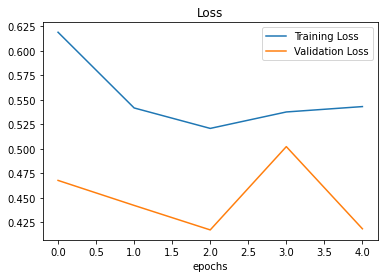

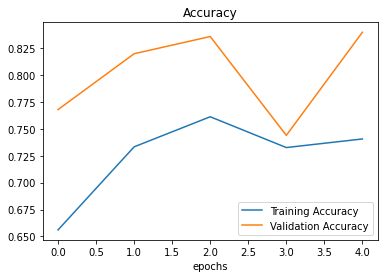

In [55]:
plot_loss_curves(history_8)

In [56]:
# Create the model
model_9 = Sequential([
  Conv2D(32,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(32,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(32,3,activation="relu"),
  Conv2D(32,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

# Compile the model
model_9.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_9 = model_9.fit(train_data_augmented_shuffled,
                      epochs = 10,
                      steps_per_epoch = len(train_data_augmented_shuffled),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 526ms/step - loss: 0.6510 - accuracy: 0.6300 - val_loss: 0.4620 - val_accuracy: 0.8080
Epoch 2/10
47/47 [==============================] - 23s 494ms/step - loss: 0.5265 - accuracy: 0.7560 - val_loss: 0.3620 - val_accuracy: 0.8500
Epoch 3/10
47/47 [==============================] - 22s 476ms/step - loss: 0.4937 - accuracy: 0.7733 - val_loss: 0.3478 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 23s 493ms/step - loss: 0.4730 - accuracy: 0.7913 - val_loss: 0.3536 - val_accuracy: 0.8400
Epoch 5/10
47/47 [==============================] - 23s 490ms/step - loss: 0.4761 - accuracy: 0.7973 - val_loss: 0.3432 - val_accuracy: 0.8400
Epoch 6/10
47/47 [==============================] - 22s 473ms/step - loss: 0.4626 - accuracy: 0.7847 - val_loss: 0.3547 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 23s 498ms/step - loss: 0.4564 - accuracy: 0.7920 - val_loss: 0.3278 - val_accuracy: 0.8680

## Making a prediction with our trained model on our own custom data

In [57]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-07-18 09:56:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-07-18 09:56:04 (28.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



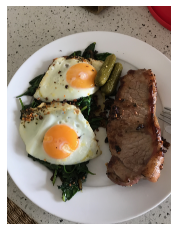

In [58]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [59]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom dara, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [60]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it
  to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=(img_shape,img_shape))
  # Rescsale the image (get all values between 0 & 1)
  img = img/255.
  return img

In [61]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
pred = model_9.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.90176255]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [63]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [64]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [65]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Accuracy: {pred.squeeze()*100:2.0f}%")
  plt.xlabel(f"Prediction: {pred_class}")
  # plt.axis(False)

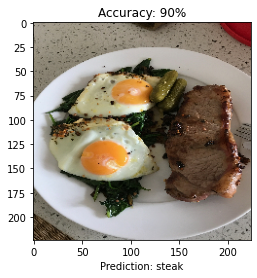

In [68]:
# Test our model on a custom image
pred_and_plot(model=model_9, filename="03-steak.jpeg")

Our model works!!! Let's try it on another image

In [67]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-07-18 09:57:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-07-18 09:57:48 (35.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



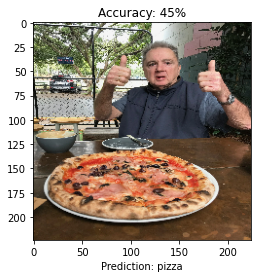

In [69]:
pred_and_plot(model=model_9, filename="03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [10]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-18 12:20:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   102MB/s    in 5.0s    

2021-07-18 12:20:30 (99.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [75]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories having {len(filenames)} images in {dirpath}.")

There are 2 directories having 0 images in 10_food_classes_all_data.
There are 10 directories having 0 images in 10_food_classes_all_data/test.
There are 0 directories having 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories having 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories having 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories having 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories having 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories having 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories having 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories having 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories having 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories having 250 images in 10_food_classes_all_data/test/ramen

In [76]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jul 18 10:03 .
drwxr-xr-x  1 root root 4096 Jul 18 10:03 ..
drwxr-xr-x 12 root root 4096 Jul 18 10:03 test
drwxr-xr-x 12 root root 4096 Jul 18 10:03 train


In [11]:
# Set up the train & test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [12]:
# Let's get tha class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


10_food_classes_all_data/train/ramen
['1062930.jpg']
10_food_classes_all_data/train/ramen/1062930.jpg
Image shape: (512, 512, 3)


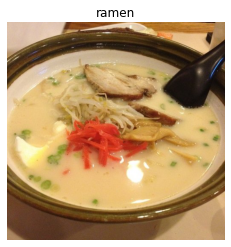

In [13]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for our model)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_10_datagen = ImageDataGenerator(rescale=1/255.)
test_10_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_10_data = train_10_datagen.flow_from_directory(train_dir,
                                                     target_size=(224,224),
                                                     class_mode="categorical",
                                                     batch_size=32)
test_10_data = test_10_datagen.flow_from_directory(test_dir,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a CNN model (start with a baseline)

We've talking a lot about the CNN Explainer website... how about we just take their model (also on 10 classes) and use it for our problem?

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
# Create the model
model_10 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

# Compile the model
model_10.compile(
    loss = "categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_10 = model_10.fit(train_10_data,
                          epochs = 5,
                          steps_per_epoch = len(train_10_data),
                          validation_data = test_10_data,
                          validation_steps = len(test_10_data))

Epoch 1/5


KeyboardInterrupt: ignored

## 5. Evaluate the model

In [103]:
# Evaluate on test data
model_10.evaluate(test_10_data)

79/79 [==============================] - 10s 129ms/step - loss: 3.9705 - accuracy: 0.2844


[3.9704668521881104, 0.28439998626708984]

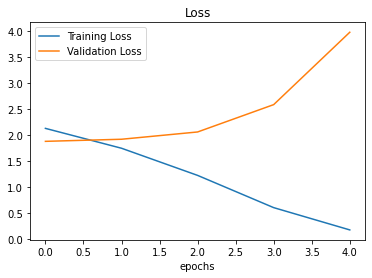

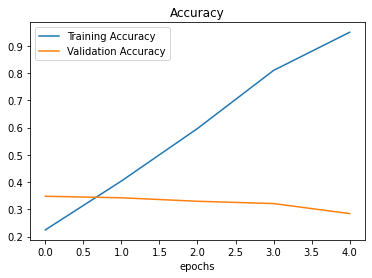

In [104]:
# Check out the model loss curves on the 10 classes
plot_loss_curves(history_10)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly...in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline model/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So let's try and fix overfitting by:
* **Get more data** - having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - If our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in a layer.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [106]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers

# Create the model
model_11 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

# Compile the model
model_11.compile(
    loss = "categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_11 = model_11.fit(train_10_data,
                          epochs=5,
                          steps_per_epoch=len(train_10_data),
                          validation_data = test_10_data,
                          validation_steps = len(test_10_data))

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.1014 - accuracy: 0.2645 - val_loss: 1.9663 - val_accuracy: 0.3144
Epoch 2/5
235/235 [==============================] - 43s 181ms/step - loss: 1.6990 - accuracy: 0.4244 - val_loss: 1.8697 - val_accuracy: 0.3564
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.2706 - accuracy: 0.5939 - val_loss: 2.0257 - val_accuracy: 0.3248
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 0.7620 - accuracy: 0.7743 - val_loss: 2.2213 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 44s 185ms/step - loss: 0.3766 - accuracy: 0.9060 - val_loss: 2.6996 - val_accuracy: 0.3188


In [109]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 28090)           

In [110]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??


### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accurcy

In [15]:
# Augmenting train_data
train_10_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.2,
                                                shear_range=0.2,
                                                zoom_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.2,
                                                horizontal_flip=True)

In [16]:
# Import the data and batchifying it
train_10_data_augmented = train_10_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         class_mode='categorical',
                                                                         batch_size=32)

Found 7500 images belonging to 10 classes.


In [17]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_12 = tf.keras.models.clone_model(model_10) # model same as Tiny VGG

# Compile the cloned model (using the same setup as previous models)
model_12.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

NameError: ignored